# **P1: Part-of-Speech (Pos) Tagging**

Sara Micol Ferraina, Adrian Orozco Rivera, Francisco Laport Lopez

In [1]:
!pip uninstall tensorflow
!pip install tensorflow==2.15.0


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.8 MB/s eta 0:00:00
  Att

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**STEP 0: VARIABLE CONFIGURATION BEFORE RUNNING THE CODE**

As we are running a Google Colab notebook, we need to define the project folder where we want to work and download the datasets.

**Please define that folder int the following cell using the variable `working_folder`**

In [5]:
working_folder = '/content/drive/MyDrive/Projects'

**STEP 1: Download and parse the datasets**


In [16]:
import sys
import numpy as np
sys.path.append(working_folder)
from Tokenino import Token
from Tokenino import MyTagger
import utils_v2 as utils


# URLs from the English datasets
url_train = 'https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/refs/heads/master/en_ewt-ud-train.conllu'
url_val ='https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/refs/heads/master/en_ewt-ud-dev.conllu'
url_test = 'https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/refs/heads/master/en_ewt-ud-test.conllu'
'''''

# URLs from the Galician datasets
url_train = 'https://raw.githubusercontent.com/UniversalDependencies/UD_Galician-TreeGal/refs/heads/master/gl_treegal-ud-train.conllu'
url_test ='https://raw.githubusercontent.com/UniversalDependencies/UD_Galician-TreeGal/refs/heads/master/gl_treegal-ud-test.conllu'
'''
from google.colab import files
# Paths to save the datasets.
file_path_train = working_folder + '/dataset'  # Train set
file_path_val = working_folder + '/valdata'  # Validation set
file_path_test = working_folder + '/testdata'  # Test set

# Download and save the datasets.
utils.download_file(url_train, file_path_train)
utils.download_file(url_val, file_path_val)
utils.download_file(url_test, file_path_test)

# Parse the datasets
train_sentences = utils.parse_conllu(file_path_train)
val_sentences = utils.parse_conllu(file_path_val)
test_sentences = utils.parse_conllu(file_path_test)



File downloaded successfully and saved to /content/drive/MyDrive/Projects/dataset
File downloaded successfully and saved to /content/drive/MyDrive/Projects/valdata
File downloaded successfully and saved to /content/drive/MyDrive/Projects/testdata


**STEP 2: Prepare the data for the network**

In [19]:
# Prepare the data for the network.
max_length = max(len(sentence) for sentence in train_sentences)
print('max_lenght: ', max_length)

# Create word vectorizer
text_vectorizer = utils.build_word_vectorizer(train_sentences, max_length)

train_input, train_output = utils.prepare_data(train_sentences, text_vectorizer, max_length)
val_input, val_output = utils.prepare_data(val_sentences, text_vectorizer, max_length)
test_input, test_output = utils.prepare_data(test_sentences, text_vectorizer, max_length)

max_lenght:  159


**STEP 3: Build the network, train it and evaluate it**

num pos tags 17
train shape (12544, 159, 17)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_3 (Masking)         (None, 159)               0         
                                                                 
 embedding_3 (Embedding)     (None, 159, 100)          1967600   
                                                                 
 bidirectional_3 (Bidirecti  (None, 159, 128)          84480     
 onal)                                                           
                                                                 
 time_distributed_3 (TimeDi  (None, 159, 17)           2193      
 stributed)                                                      
                                                                 
Total params: 2054273 (7.84 MB)
Trainable params: 2054273 (7.84 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________________________

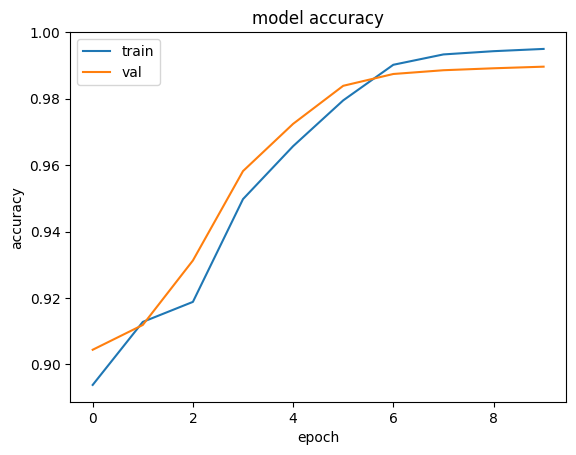

17/17 [==============================] - 5s 279ms/step - loss: 0.0290 - accuracy: 0.9917
Test Loss: 0.0290
Test Accuracy: 0.9917


In [20]:
# Build the network and train it.
vocab_size = text_vectorizer.vocabulary_size()  # Vocabulary size built with TextVectorization --- This should be the size of all the tokens = text_vectorizer.vocabulary_size()
embedding_dim = 100  # Dimension of word embeddings
lstm_units = 64  # Number of LSTM units
num_pos_tags = np.shape(train_output)[2]  # Number of POS tags

print('num pos tags', num_pos_tags)
print('train shape', train_output.shape)
# Create the model
tagger = MyTagger()
tagger.build_model(max_length, vocab_size, embedding_dim, lstm_units, num_pos_tags)

tagger.train_model(train_input, train_output, val_inputs=None, val_outputs=None, epochs=10, batch_size=128)
tagger.plot_history() # plot model trainig and validation

loss, accuracy = tagger.model_evaluate(test_input, test_output, batch_size=128)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


**STEP 4: Do the Predictions:**

In [21]:
# Prediction
predictions = tagger.predict(test_input)

# Obtain the predicted classes
predicted_classes = np.argmax(predictions, axis=-1)

# Stamp the results only for the first sentence
if test_sentences: #ensure that there are sentences
    print(f"Sentence: {' '.join([token.form for token in test_sentences[1]])}")
    print(f"Predicted classes (IDs): {predicted_classes[1]}")
    print("-" * 40)  # Divider for better readability
else:
    print("No sentences found in the test set.")



65/65 [==============================] - 4s 46ms/step
Sentence: What if Google expanded on its search - engine ( and now e-mail ) wares into a full - fledged operating system ?
Predicted classes (IDs): [10 13 11 15  1 10  7 12  7 12  4  2  7 12  7  1  5  0 12  0  7  7 12  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
----------------------------------------
